# k 近邻

k 近邻是一种基本的分类和回归方法。基本做法是：对给定的训练实例点和输入实例点，首先确定输入实例点的 k 个最近邻训练实例点，再利用这 k 个训练实例点的类的多数来预测输入实例点的类。

k 近邻模型是使用训练数据集对特征空间的划分。当训练集、距离度量、k值和分类决策规则确定后，其结果唯一确定。

k 近邻法三要素：
- 距离度量，常用欧式距离或 $L_p$ 距离
- k值，该值越小，模型越复杂
- 分类决策规则，常用多数表决规则

k 近邻法的实现需要考虑如何快速搜索 k 个最近邻点.

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df_iris = load_iris(as_frame=True, return_X_y=True)
x = np.array(df_iris[0].iloc[:100, 0:2])
y = np.array(df_iris[1].iloc[:100])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [3]:
class kNN:

    def __init__(self, x_train, y_train, k=3, p=2):
        """
        k: 临近点数量
        p: 距离度量
        """
        self.x_train = x_train
        self.y_train = y_train
        self.k = k
        self.p = p

    def predict(self, x):
        knn_list = []
        for i in range(self.k):
            dist = np.linalg.norm(x - self.x_train[i], ord=self.p)
            knn_list.append((dist, self.y_train[i]))

        for i in range(self.k, len(self.x_train)):
            max_index = knn_list.index(max(knn_list, key=lambda x: x[0]))
            dist = np.linalg.norm(x - self.x_train[i], ord=self.p)
            if dist < knn_list[max_index][0]:
                knn_list[max_index] = (dist, self.y_train[i])

        # 此时 knn_list 中已经是k个最近的点
        knn = [k[-1] for k in knn_list]
        count_pairs = Counter(knn)
        max_count = sorted(count_pairs.items(), key=lambda x: x[1])[-1][0]
        return max_count

    def score(self, x_test, y_test):
        y_predict = [self.predict(x) for x in x_test]
        return sum(y_predict == y_test) / len(y_test)

In [4]:
clf = kNN(x_train, y_train, k=3, p=2)
clf.score(x_test, y_test)

1.0

In [5]:
test_point = [6.0, 3.0]
print("Test Point: {}".format(clf.predict(test_point)))

Test Point: 1


In [23]:
idx0 = np.where(y_train==0)
idx0

(array([ 2,  3,  5,  6,  8, 10, 11, 13, 15, 18, 19, 20, 21, 22, 24, 25, 27,
        29, 30, 31, 32, 33, 34, 36, 38, 43, 46, 51, 53, 57, 62, 63, 64, 66,
        67, 68, 74, 77]),)

[[5.  4.4 5.7 5.  4.9 4.8 4.6 5.2 5.4 5.  5.4 5.  4.9 5.  5.2 5.1 5.  4.3
  4.8 4.6 5.1 4.4 4.4 4.6 5.5 5.  5.1 4.5 5.3 5.2 4.9 4.7 4.9 5.1 4.7 5.1
  5.4 5.8]]


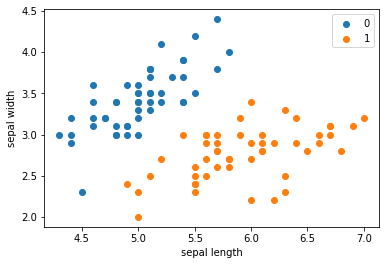

In [13]:
#[x1 if x1 for x1 in x_train + x_test]
idx_train = np.where(y_train==0)
idx_test = np.where(y_test==0)
plt.scatter(np.concatenate([x_train[idx_train, 0], x_test[idx_test, 0]], axis=1), 
            np.concatenate([x_train[idx_train, 1], x_test[idx_test, 1]], axis=1), label='0')

idx_train = np.where(y_train==1)
idx_test = np.where(y_test==1)
plt.scatter(np.concatenate([x_train[idx_train, 0], x_test[idx_test, 0]], axis=-1), 
            np.concatenate([x_train[idx_train, 1], x_test[idx_test, 1]], axis=-1), label='1')
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()